In [8]:
import pandas as pd
from libsvm.svmutil import *
import numpy as np
import scatter_plot

# A2-ring-separable data
#read and parse the training set .csv features file 
df = pd.read_csv('Data/A2-bank/bank-additional_normalized.csv', delimiter = '\t')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,1,1,1,1,1,1,1,...,2,999,0,1,-0.3333,-0.4606,-0.6151,-0.6925,0.0246,0
1,39,2,2,2,1,2,1,2,1,1,...,4,999,0,1,0.8750,0.3975,0.2050,0.9138,0.7195,0
2,25,2,1,2,1,1,1,2,2,2,...,1,999,0,1,1.0000,0.7646,-0.2469,0.9624,1.0000,0
3,47,3,1,3,1,1,1,1,3,3,...,1,999,0,1,0.3750,-0.2214,-0.2636,0.6127,0.7558,0
4,32,2,2,3,1,2,1,1,4,4,...,3,999,2,2,-0.0417,0.5573,0.1130,-0.8871,-1.0000,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3090 non-null   int64  
 1   job             3090 non-null   int64  
 2   marital         3090 non-null   int64  
 3   education       3090 non-null   int64  
 4   default         3090 non-null   int64  
 5   housing         3090 non-null   int64  
 6   loan            3090 non-null   int64  
 7   contact         3090 non-null   int64  
 8   month           3090 non-null   int64  
 9   day_of_week     3090 non-null   int64  
 10  duration        3090 non-null   int64  
 11  campaign        3090 non-null   int64  
 12  pdays           3090 non-null   int64  
 13  previous        3090 non-null   int64  
 14  poutcome        3090 non-null   int64  
 15  emp.var.rate    3090 non-null   float64
 16  cons.price.idx  3090 non-null   float64
 17  cons.conf.idx   3090 non-null   f

In [10]:
df.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,...,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000
mean,39.184142,4.031068,1.533010,2.952104,1.000324,1.453722,1.164078,1.317799,3.749515,3.022977,...,2.509385,953.350809,0.208091,1.199353,0.397173,0.037587,-0.148023,0.291023,0.493690,0.119741
std,10.184002,2.481594,0.688699,1.290064,0.017990,0.497934,0.370406,0.465696,2.638469,1.396635,...,2.598168,208.030041,0.560141,0.492481,0.665110,0.456650,0.397195,0.802728,0.578315,0.324711
min,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,31.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,999.000000,0.000000,1.000000,-0.333300,-0.318800,-0.322200,-0.692500,0.024600,0.000000
50%,37.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,...,2.000000,999.000000,0.000000,1.000000,0.875000,-0.031200,-0.246900,0.914300,0.719500,0.000000
75%,46.000000,5.000000,2.000000,4.000000,1.000000,2.000000,1.000000,2.000000,6.000000,4.000000,...,3.000000,999.000000,0.000000,1.000000,1.000000,0.397500,0.205000,0.961900,1.000000,0.000000
max,88.000000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,2.000000,10.000000,5.000000,...,35.000000,999.000000,6.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
columns = df.shape[1]

# construct an array for all features input values
inputcolumns = df.columns[0 : 20]
features = df[inputcolumns].values

# construct an array for all features target values
outputcolumn = df.columns[20]
targets = df[outputcolumn].values

print(features.shape)
print(targets.shape)


(3090, 20)
(3090,)


In [12]:
#select the first 80% patterns for training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.20, random_state= 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2472, 20)
(618, 20)
(2472,)
(618,)


In [29]:
# train the model using the training set 
model = svm_train(y_train, x_train, '-t 0 -c 100')

In [28]:
# Predict labels using test set
predicted_labels, accuracy, decision_values = svm_predict(y_test, x_test, model)



Accuracy = 90.7767% (561/618) (classification)


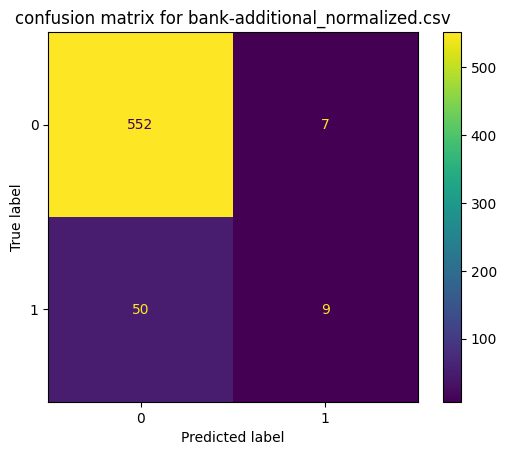

In [31]:
import matplotlib.pyplot as plt
from sklearn import metrics

actual = y_test
predicted = predicted_labels

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.title("confusion matrix for bank-additional_normalized.csv")
plt.show()
